# Title : Implementing Feed forward neural networks
Aim: Implementing Feedforward neural networks with Keras and TensorFlow
Import the necessary packages
Load the training and testing data (MNIST/CIFAR10)
Define the network architecture using Keras
Train the model using SGD
Evaluate the network
Plot the training loss and accuracy


In [5]:
#a)Importing all necessary libraries/packages
import tensorflow as tf   # to create our neural n/w and to make it fast
from tensorflow import keras   # is is interface for tensorflow
import matplotlib.pyplot as plt   #for grafical plotting and data visualization
import random    #for making predictions on built model(to generate random number)

In [6]:
#b) load the training and testing data

mnist=tf.keras.datasets.mnist  #importing MNIST dataset
(x_train,y_train), (x_test,y_test) = mnist.load_data()  #splitting it into training and testing 

x_train=x_train / 255  #our greyscale image max range is 0 to 255
x_test=x_test / 255

In [11]:
#c)Define the network architecture using keras

model=keras.Sequential([  # to build feed fwd n/w , we need to use sequential method
    keras.layers.Flatten(input_shape=(28,28)), #for input layer , flatten used to convert input data into vector form (28,28)is image shape
     keras.layers.Dense(128,activation="relu"),  #128 is number of neurons
     keras.layers.Dense(10,activation="softmax") # i need 10 neurons in output
])  

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
#D) train the model using SGD
model.compile(optimizer="sgd",  # sgd is a algorithm
              loss="sparse_categorical_crossentropy",  # loss calculates dissimilarity
              metrics=['accuracy'] ) #it will judge the performance of model

history=model.fit(x_train, y_train, validation_data = (x_test,y_test),epochs=3)  #  # it improves accuracy as its value increases,if we set 10, then accuracy will improve more 

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6574 - accuracy: 0.8339 - val_loss: 0.3604 - val_accuracy: 0.9022
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3408 - accuracy: 0.9047 - val_loss: 0.2964 - val_accuracy: 0.9174
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2929 - accuracy: 0.9172 - val_loss: 0.2644 - val_accuracy: 0.9279


313/313 [==============================] - 1s 2ms/step - loss: 0.2644 - accuracy: 0.9279
loss=  0
Accuracy=  1


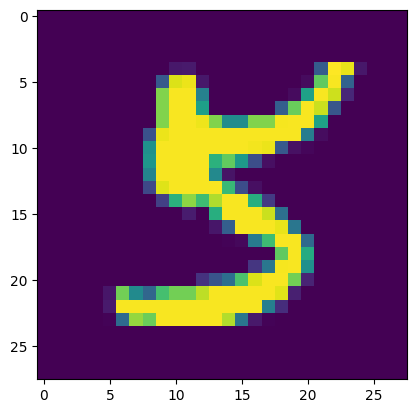

313/313 [==============================] - 0s 1ms/step


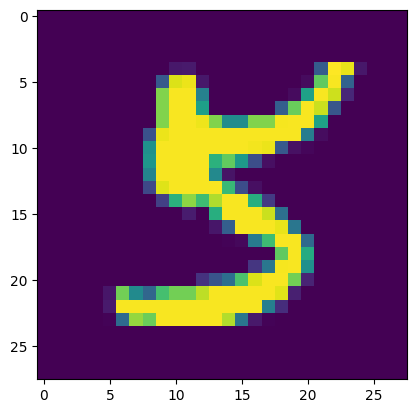

Predicted value: [5.0382526e-04 7.0701863e-06 1.6898532e-05 2.0025406e-02 4.3656368e-05
 9.6841484e-01 2.0988655e-06 1.1215000e-04 1.0838322e-02 3.5729288e-05]


In [13]:
#e)Evaluate the network

test_loss,test_acc=model.evaluate(x_test,y_test)
print("loss=%3.f" %test_loss)
print("Accuracy=%3.f" %test_acc)

n=random.randint(0,9999)
plt.imshow(x_test[n])  #to display nth ranodm image
plt.show()

predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

print('Predicted value:',predicted_value[n])

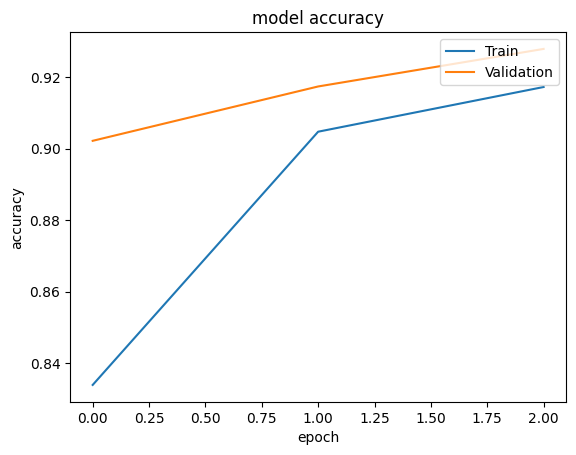

In [17]:
#f plot the training loss and accuracy


#TRAINING ACCUARACY
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'],loc="upper right")
plt.show()

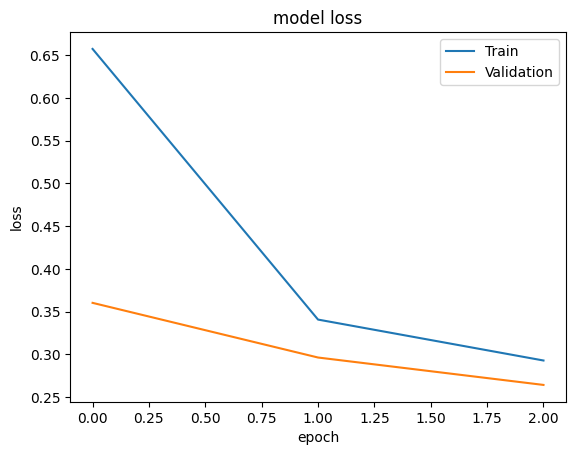

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'],loc="upper right")
plt.show()